### Method: 

#### Baseline
We first constructed a matched baseline population, in which, for each female author, we identified, without-replacement, a male author from the same discipline. The experiment was replicated 50 times, and the reported performance was averaged over all random trials. 

#### Carreer length
We then created our second experimental population, as a subset of the first, in which we matched each
female author to a male author from the same discipline and with exactly the same career length.   


#### Country and affiliation
We then assigned each author to a group based on their highest ranking affiliation, for which we binned the institutions by rank into 15 equal volume bins; no significant difference occurs for other choices of the affiliation binning. The matched baseline population, in which, for each female author, we identified, without-replacement, a male author from the same country, discipline, and with the same affiliation rank bin consistently produced 32,782 matched pairs. The gender gaps
in productivity and impact are significantly larger in the matched populations (Fig. S1A,B), likely due to the fact that the
coverage in country and affiliation information is biased towards more recent and senior scientists. We then created our second experimental population, as a subset of the first, in which we matched each female author to a male author from the same country, discipline, with the same affiliation rank bin, and with exactly the same career length.


#### Total productivity matching
D. Total productivity matching. Our third matching experiment controlled for the total productivity and explored the resulting
237 change in impact. Specifically, we constructed another set of matched samples in which we identified for each female author, a
238 male author from the same country, discipline, and approximately the same affiliation rank. In this population, the gender gap
239 in career impact was 50.7% in favor of male authors. We then created our second experimental population, as a subset of the
240 first, in which we matched each female author to a male author from the same country, discipline, with approximately the
241 same affiliation rank, and with exactly the same total productivity. With the addition of matching on total productivity, the
242 impact gap actually flips in favor of female scientists who receives an average of 1.9% more citations. We report the mean
243 impact gap over 100 randomized trials and the standard deviation for the impact gap is nearly zero.


In [1]:
import os 
import pandas as pd
import numpy as np
from visualizations import plot_group_dist, plot_side_by_side
import random

from matplotlib import pyplot as plt 

plt.style.use('ggplot')

In [2]:
def read_author_metadata(fos_id=162324750):
    base_destination = "/home/laal/MAG/DATA/AuthorMetadataField.csv"
    
    columns = ['AuthorId', 'FieldOfStudyId', 'Gender', 'MinAffiliationRank', 'NumPapers', 'MinPubDate', 'MaxPubDate', 'PubsPerYear']
    
    author_df = pd.DataFrame()
    
    for file in os.listdir(base_destination):
        if file.endswith('.csv'):
            df = pd.read_csv(base_destination + "/" + file, names=columns, sep="\t")
            author_df = pd.concat([author_df, df.query("FieldOfStudyId == {}".format(fos_id))])
    
    # parse datetimes
    author_df['MinPubDate'] = pd.to_datetime(author_df['MinPubDate'])
    author_df['MaxPubDate'] = pd.to_datetime(author_df['MaxPubDate'])
    
    author_df['MinPubYear'] = author_df['MinPubDate'].apply(lambda x: x.year)
    author_df['MaxPubYear'] = author_df['MaxPubDate'].apply(lambda x: x.year)
    
    return author_df

In [3]:
author_df = read_author_metadata()

In [4]:
author_df.head(100)

,AuthorId,FieldOfStudyId,Gender,MinAffiliationRank,NumPapers,MinPubDate,MaxPubDate,PubsPerYear,MinPubYear,MaxPubYear
18,3809,162324750,-1,NaN,1,2010-11-29,2010-11-29,NaN,2010.0,2010.0
96,19634,162324750,1,10389.0,1,2007-03-08,2007-03-08,NaN,2007.0,2007.0
209,47333,162324750,1,10824.0,6,2012-10-12,2019-03-30,0.927966,2012.0,2019.0
231,53423,162324750,-1,6404.0,9,2014-10-01,2019-06-17,2.758721,2014.0,2019.0
245,55871,162324750,1,NaN,2,2004-11-15,2008-08-25,0.529369,2004.0,2008.0
...,...,...,...,...,...,...,...,...,...,...
4169,1058749,162324750,0,11500.0,4,2001-01-02,2015-04-15,0.279908,2001.0,2015.0
4217,1070808,162324750,0,9607.0,8,1991-01-01,2018-02-11,0.294860,1991.0,2018.0
4304,1096973,162324750,1,6833.0,28,1998-06-01,2020-01-01,1.342593,1998.0,2020.0
4339,1107763,162324750,1,NaN,1,2007-01-01,2007-01-01,NaN,2007.0,2007.0


In [4]:
from tqdm.notebook import trange, tqdm


def match(centrality_df, author_df, random_seed, centrality='PageRank', 
          max_year_limit=2018, min_year_tolerance=0):
        
    pd.options.mode.chained_assignment = None
        
    # remove unknown gender
    dataset = author_df.query("Gender != -1")
    dataset = dataset[dataset.AuthorId.isin(centrality_df.AuthorId)]
    
    # affiliation_quintile 
    dataset.loc[:,"AffiliationBin"] = pd.qcut(dataset.MinAffiliationRank, 15, labels = False)
    dataset.loc[:,'MaxYear'] = dataset.MaxPubYear.apply(lambda x: 2021 if x >= max_year_limit else x)
    
    male_population = dataset.query("Gender == 1")
    female_population = dataset.query("Gender == 0")
    
    # sample random from opposite gender
    male_sampled = male_population.sample(female_population.shape[0], replace=False, random_state=random_seed)
    female_sampled = female_population
    
    print("Collected {} female and {} male samples".format(len(male_sampled), len(female_sampled)))
    
    ## Compute statistics and visualize    
    ids = list(male_sampled.AuthorId.values) + list(female_sampled.AuthorId.values)
    cent_df_random = cent_df[cent_df.AuthorId.isin(ids)]
    
    return cent_df_random, cent_df_random
    
    #_, __ = plot_group_dist(cent_df_sampled, centrality, interval_size=100, max_N=len(cent_df_new), protected_group=0, 
    #                        unprotected=1, show_unknown=False, field_name='Economics', na_removed=True, 
    #                        ax=None, global_rates=None)
    
    # sample from population with same starting time and end time
    sample_females = []
    sample_males   = []
    
    print("Initiating matching on carreer characteristics")
    
    for female_record in tqdm(female_population.to_dict('records'), total=len(female_population)):
        
        
        male_filtered = male_population[  (abs(male_population.MinPubYear - female_record['MinPubYear']) <= min_year_tolerance)
                                        & (male_population.MaxYear == female_record['MaxYear']) 
                                        & (male_population.AffiliationBin == female_record['AffiliationBin'])]
        if male_filtered.empty:
            continue
        
        male_sample = male_filtered.sample(1, random_state=random_seed)
        # remove sample from male_population
        male_population.drop(male_sample.index, axis='index', inplace=True)
        
        sample_females.append(female_record)
        sample_males.append(male_sample.iloc[0].to_dict())
        
    print("Found {} matches to {} females".format(len(sample_females), len(female_population)))
    
    females_df = pd.DataFrame.from_records(sample_females)
    males_df = pd.DataFrame.from_records(sample_males)
    
    ## Compute statistics and visualize    
    ids = list(females_df.AuthorId.values) + list(males_df.AuthorId.values)
    cent_df_matched = cent_df[cent_df.AuthorId.isin(ids)]
    
    #_, __ = plot_group_dist(cent_df_sampled, centrality, interval_size=100, max_N=len(cent_df_new), protected_group=0, 
    #                        unprotected=1, show_unknown=False, field_name='Economics', na_removed=True, 
    #                        ax=None, global_rates=None)
    
    return cent_df_random, cent_df_matched

In [5]:
cent_df = pd.read_csv("/home/laal/MAG/DATA/NETWORKS/SimpleWeightEconomics2020CentralityGendered.csv", sep="\t")

In [6]:
cent_df_random, cent_df_matched = match(cent_df, author_df, random_seed=42, centrality='PageRank', 
                                        max_year_limit=2018, min_year_tolerance=0)

Collected 111367 female and 111367 male samples


In [13]:

def plot_matched_side_by_side(cent_df, field_name, centrality_random_sample, centrality_matched_sample, 
                              interval=1000, figsize=(15,12), centrality="Pagerank", filepath=None):
    
    idx = 0
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=figsize, sharex=False, sharey=True)
    axs = list(axs.flatten())
    
    labelsize = 26
    
    cent_df.sort_values(by=centrality, ascending=False, inplace=True)

    cent_df.reset_index(inplace=True)

    cent_df['rank_position'] = cent_df.index
    rank_position_df = cent_df[['AuthorId', 'rank_position']]

    
    centrality_format = r"$\bf{" + centrality.replace(" ", "\ ") + "}$"
    
    plot_group_dist(cent_df, centrality, 
                    interval_size=interval, 
                    max_N=len(cent_df), 
                    protected_group=0, 
                    unprotected=1,
                    show_unknown=False,
                    na_removed=True,
                    field_name=field_name, 
                    ax=axs[0], global_rates=None)
    
    axs[0].set_title("True population \n N = {:,}, Increment = {}".format(cent_df.shape[0], interval),
                    fontsize=labelsize, color='#363534')
    axs[0].set_ylabel(centrality_format + "\nGender prop. in top N", fontsize=labelsize + 4)
    
    axs[0].tick_params(axis='y', labelsize=labelsize + 8)
    
    axs[0].legend().set_visible(False)
    axs[0].set_ylim(-0.05, 1.05)

    print("Full data median: {}".format(cent_df['rank_position'].median()))
            
    y, x = plot_group_dist(centrality_random_sample, centrality, 
                           interval_size=interval,
                           max_N=len(centrality_random_sample), 
                           protected_group=0, 
                           unprotected=1, 
                           show_unknown=False,
                           na_removed=True,
                           field_name=field_name,
                           ax=axs[1],
                           global_rates=None)
                           
    axs[1].set_title("Random matching \n N = {:,}, Increment = {}".format(centrality_random_sample.shape[0], interval),
                    fontsize=labelsize, color='#363534')
    axs[1].set_ylabel(None)
    axs[1].legend().set_visible(False)

    print("Random data median: {}".format(centrality_random_sample.merge(rank_position_df, how='left', left_on='AuthorId', right_on='AuthorId')['rank_position'].median()))
        

    y, x = plot_group_dist(centrality_matched_sample, centrality, 
                           interval_size=interval,
                           max_N=len(centrality_matched_sample), 
                           protected_group=0, 
                           unprotected=1, 
                           show_unknown=False,
                           na_removed=True,
                           field_name=field_name,
                           ax=axs[2],
                           global_rates=None)

    axs[2].set_title("Career and affiliation matching \n N = {:,}. Increment = {}"
                     .format(centrality_matched_sample.shape[0], interval),
                     fontsize=labelsize, color='#363534')
    axs[2].set_ylabel(None)
    
    if centrality == 'PageRank':
        axs[2].legend(loc="lower right", fontsize=labelsize-5).set_visible(True)
    else:
        axs[2].legend(loc="lower right", fontsize=labelsize-6).set_visible(False)
    # print("Matched data median: {}".format(centrality_matched_sample.join(rank_position_df, how='left', on='AuthorId', rsuffix='x')['rank_position'].median()))
    print("Matched data median: {}".format(centrality_matched_sample.merge(rank_position_df, how='left', left_on='AuthorId', right_on='AuthorId')['rank_position'].median()))
        
    
    plt.suptitle("Gender distribution in Top N ranking in " + r"$\bf{" +  field_name + "}$ on matched populations"
                 , fontsize=labelsize + 4, color='#363534')
    plt.tight_layout()

    datasets = [cent_df, centrality_random_sample, centrality_matched_sample]
    
    # for i in range(3):
    #     maxval = datasets[i].shape[0]
    #     xticks = []
    #     for tick in axs[i].get_xticklabels():
    #         tick.set_text("{0:.1f}".format(100 * (tick._x / maxval)))
    #         xticks.append(tick)
    #     axs[i].set_xticklabels(xticks)

    #     axs[i].set_xlabel('% of top N')

    for i in range(3):
        axs[i].set_xticks([0. ,  20,  40,  60,  80,  100])
        axs[i].set_xlabel('% of top N', fontsize=labelsize)
        axs[i].tick_params(axis='x', labelsize=labelsize + 10, rotation=90)

    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        plt.show()


Full data median: 207867.5
Random data median: 214211.0
Matched data median: 214211.0


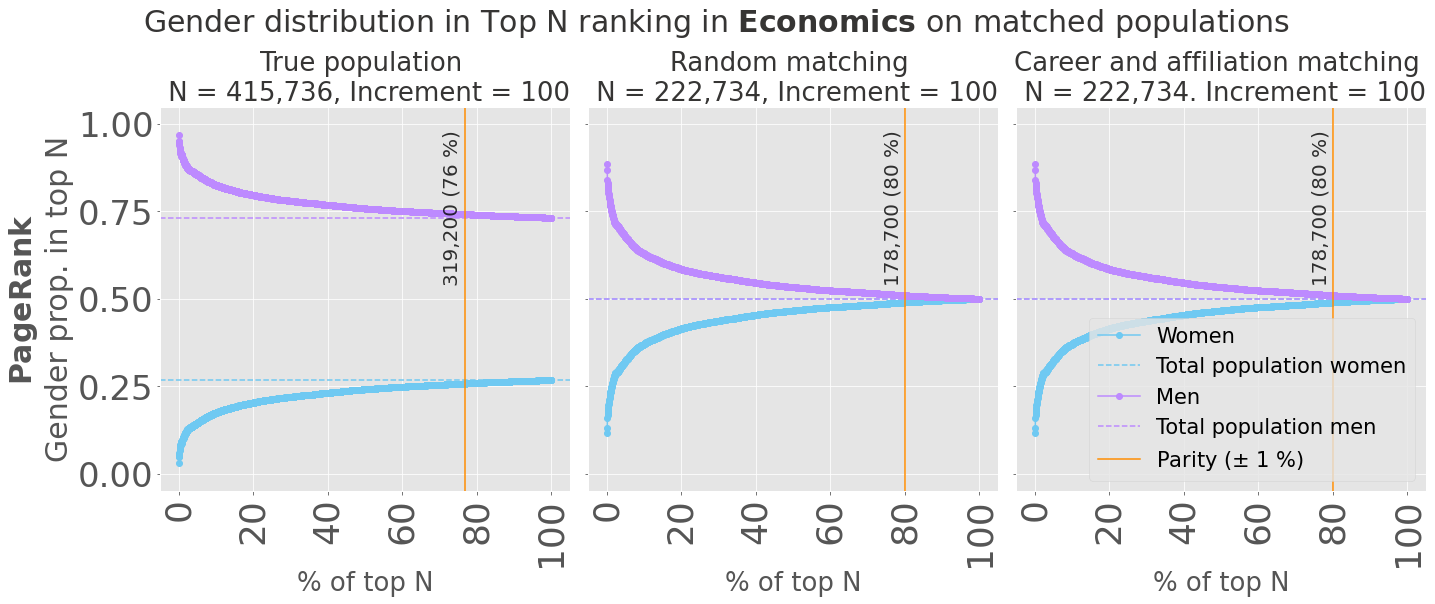

In [14]:
cent_df_filtered = cent_df.query("Gender != -1")
plot_matched_side_by_side(cent_df_filtered, "Economics", cent_df_random, cent_df_matched, 
                          interval=100, figsize=(20, 7.5), centrality="PageRank")

Collected 70645 female and 70645 male samples


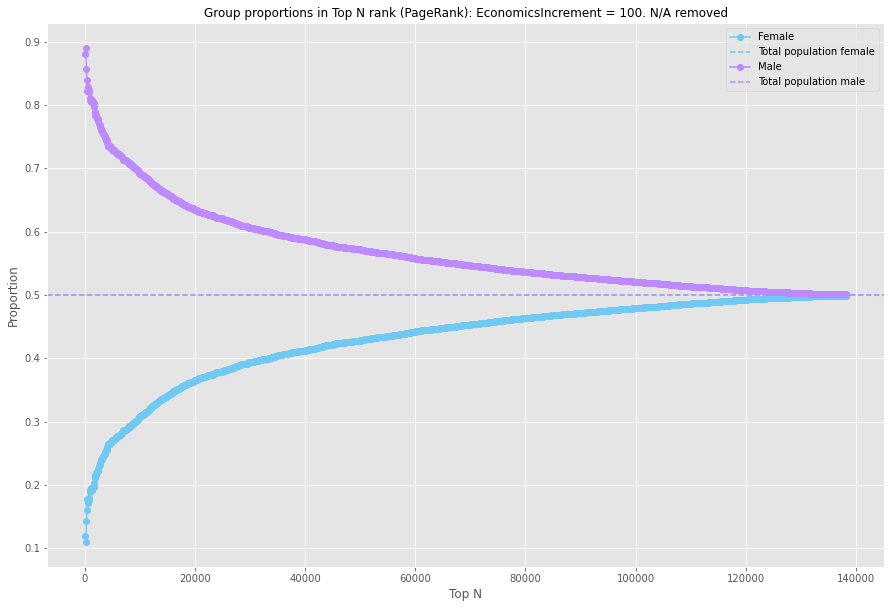

In [89]:
test2 = match(cent_df, author_df, random_seed=43, centrality='PageRank', 
              max_year_limit=2018, min_year_tolerance=0)

In [68]:
cent_df.head()

,AuthorId,PageRank,PageRank05,InDegreeStrength,InDegree,OutDegreeStrength,OutDegree,Gender,Rank
0,3274717,8.922499e-07,1.135432e-06,60.801586,140.0,132.944440,178.0,1,16917
1,4318212,2.512850e-07,5.545155e-07,0.333333,4.0,7.666666,34.0,-1,19956
2,4561536,5.722828e-07,7.241771e-07,28.833334,166.0,96.222220,313.0,1,18352
3,4676031,4.102555e-07,7.383005e-07,8.750000,43.0,29.733334,120.0,1,16518
4,4848382,2.773767e-07,5.616168e-07,2.500000,8.0,1.500000,3.0,0,19160


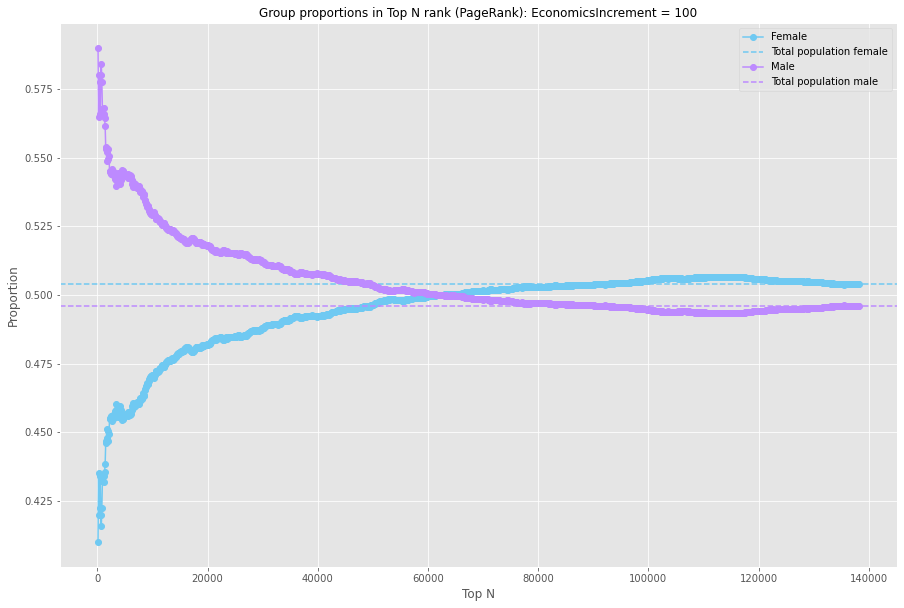

In [78]:
_, __ = plot_group_dist(cent_df_new, 'PageRank', interval_size=100, max_N=len(cent_df_new), protected_group=0, 
                        unprotected=1, 
                        show_unknown=False, field_name='Economics', na_removed=False, ax=None, global_rates=None)

In [79]:
cent_df_new.Gender.value_counts()

0    69691
1    68561
Name: Gender, dtype: int64

(138252, 9)

In [55]:
author_df.sample(1).iloc[0].to_dict()

{'AuthorId': 2558349125,
 'FieldOfStudyId': 162324750,
 'Gender': 1,
 'MinAffiliationRank': 10640,
 'NumPapers': 1,
 'MinPubDate': Timestamp('2016-11-01 00:00:00'),
 'MaxPubDate': Timestamp('2016-11-01 00:00:00'),
 'PubsPerYear': nan,
 'MinPubYear': 2016.0,
 'MaxPubYear': 2016.0}

In [65]:
sideone = pd.DataFrame.from_records(test[0])
sidetwo = pd.DataFrame.from_records(test[1])

In [72]:
mathes = pd.concat([sideone, sidetwo], axis=1)

In [59]:
for i in range(10):
    print(test[0][i])
    print(test[1][i])
    print("")

{'AuthorId': 87677, 'FieldOfStudyId': 162324750, 'Gender': 0, 'MinAffiliationRank': 6071, 'NumPapers': 16, 'MinPubDate': Timestamp('1999-07-29 00:00:00'), 'MaxPubDate': Timestamp('2008-06-15 00:00:00'), 'PubsPerYear': 1.8002466091245375, 'MinPubYear': 1999.0, 'MaxPubYear': 2008.0, 'AffiliationBin': 2, 'MaxYear': 2008.0}
{'AuthorId': 50066785, 'FieldOfStudyId': 162324750, 'Gender': 1, 'MinAffiliationRank': 5984, 'NumPapers': 10, 'MinPubDate': Timestamp('1999-02-01 00:00:00'), 'MaxPubDate': Timestamp('2008-02-01 00:00:00'), 'PubsPerYear': 1.110435047155461, 'MinPubYear': 1999.0, 'MaxPubYear': 2008.0, 'AffiliationBin': 2, 'MaxYear': 2008.0}

{'AuthorId': 106437, 'FieldOfStudyId': 162324750, 'Gender': 0, 'MinAffiliationRank': 7706, 'NumPapers': 3, 'MinPubDate': Timestamp('2004-01-01 00:00:00'), 'MaxPubDate': Timestamp('2017-02-10 00:00:00'), 'PubsPerYear': 0.2286489872624764, 'MinPubYear': 2004.0, 'MaxPubYear': 2017.0, 'AffiliationBin': 8, 'MaxYear': 2017.0}
{'AuthorId': 2155084982, 'Field

In [33]:
!conda install -n gtenv -c conda-forge tqdm

Exception ignored in: <function _releaseLock at 0x7f79afbce940>
Traceback (most recent call last):
  File "/home/laal/.conda/envs/gtenv/lib/python3.9/logging/__init__.py", line 223, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


^C

CondaError: KeyboardInterrupt



In [34]:
import tqdm

<AxesSubplot:ylabel='Frequency'>

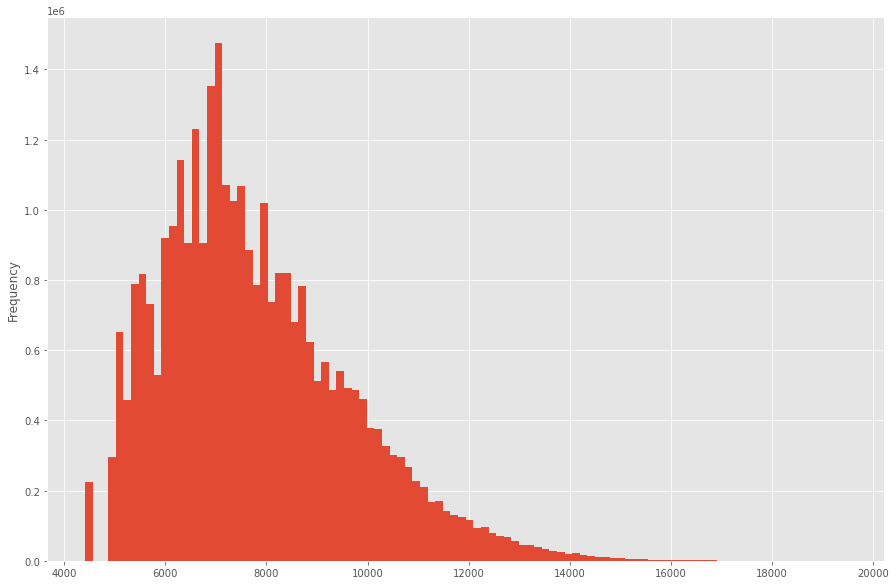

In [36]:
author_df.MinAffiliationRank.plot(kind='hist', bins=100)

In [14]:
pd.qcut(author_df.MinAffiliationRank, 15, labels = False).value_counts()

0    6252873
2    6177371
4    6175359
3    6173422
1    6098327
Name: MinAffiliationRank, dtype: int64

In [16]:
author_df['AffiliationBin'] = pd.qcut(author_df.MinAffiliationRank, 15)

In [17]:
author_df.head()

,index,AuthorId,FieldOfStudyId,Gender,MinAffiliationRank,NumPapers,MinPubDate,MaxPubDate,PubsPerYear,MinPubYear,MaxPubYear,AffiliationBin
0,0,978,138885662,0,8613,1,2018-01-01,2018-01-01,NaN,2018.0,2018.0,"(8340.0, 8751.0]"
1,1,978,144024400,0,7659,2,2013-07-11,2017-01-01,0.574803,2013.0,2017.0,"(7601.0, 7958.0]"
2,2,978,15744967,0,7659,5,2009-04-01,2020-11-01,0.431238,2009.0,2020.0,"(7601.0, 7958.0]"
3,3,978,142362112,0,7659,3,2011-11-06,2017-01-24,0.574502,2011.0,2017.0,"(7601.0, 7958.0]"
4,4,978,205649164,0,7659,1,2012-05-24,2012-05-24,NaN,2012.0,2012.0,"(7601.0, 7958.0]"


In [19]:
author_df.iloc[10]

index                                  10
AuthorId                             3345
FieldOfStudyId                   15744967
Gender                                  1
MinAffiliationRank                   6027
NumPapers                               3
MinPubDate            1981-06-01 00:00:00
MaxPubDate            1987-11-01 00:00:00
PubsPerYear                       0.46715
MinPubYear                         1981.0
MaxPubYear                         1987.0
AffiliationBin           (5800.0, 6222.0]
Name: 10, dtype: object

In [53]:
author_df.drop(17744445, axis='index')

,AuthorId,MinAffiliationRank,NumPapers,MinPubDate,MaxPubDate,PubsPerYear,MinPubYear,MaxPubYear
AuthorId,,,,,,,,
71924100,71924100,7231,1,1999-09-01,1999-09-01,NaN,1999.0,1999.0
33923547,33923547,8359,3,2010-12-01,2012-11-02,1.559829,2010.0,2012.0
127413603,127413603,8359,4,2011-04-27,2013-09-01,1.701632,2011.0,2013.0
41008148,41008148,8359,9,2009-11-01,2014-01-01,2.158344,2009.0,2014.0
127413603,127413603,8057,1,2012-11-01,2012-11-01,NaN,2012.0,2012.0
...,...,...,...,...,...,...,...,...
86803240,86803240,7224,1,2009-03-01,2009-03-01,NaN,2009.0,2009.0
127413603,127413603,8189,1,2005-07-11,2005-07-11,NaN,2005.0,2005.0
86803240,86803240,5526,1,1994-01-01,1994-01-01,NaN,1994.0,1994.0


In [54]:
author_df[author_df.AuthorId == 86803240]

,AuthorId,MinAffiliationRank,NumPapers,MinPubDate,MaxPubDate,PubsPerYear,MinPubYear,MaxPubYear
AuthorId,,,,,,,,
86803240,86803240,8619,1,2013-01-01,2013-01-01,NaN,2013.0,2013.0
86803240,86803240,6325,3,2001-05-01,2003-10-21,1.212625,2001.0,2003.0
86803240,86803240,6589,1,1991-07-01,1991-07-01,NaN,1991.0,1991.0
86803240,86803240,7008,2,2017-01-14,2020-09-21,0.542348,2017.0,2020.0
86803240,86803240,6944,2,2001-02-01,2017-01-27,0.125021,2001.0,2017.0
...,...,...,...,...,...,...,...,...
86803240,86803240,6707,9,2007-07-20,2017-04-01,0.927180,2007.0,2017.0
86803240,86803240,7668,1,2002-09-01,2002-09-01,NaN,2002.0,2002.0
86803240,86803240,7224,1,2009-03-01,2009-03-01,NaN,2009.0,2009.0


## Inter-event analysis
